[https://www.kaggle.com/competitions/spaceship-titanic/rules]

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from IPython.display import display, HTML


In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train["Cabin"].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported'>

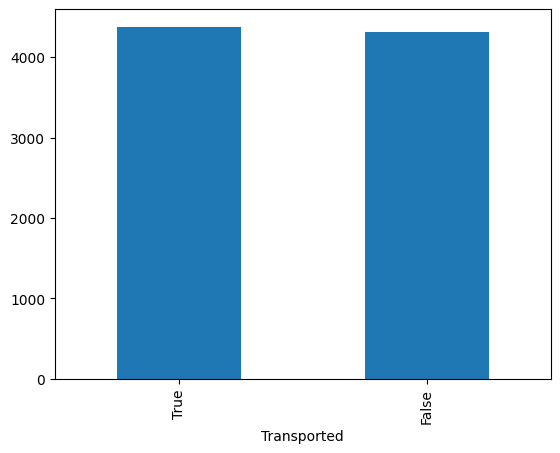

In [5]:
train["Transported"].value_counts().plot(kind="bar")

In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

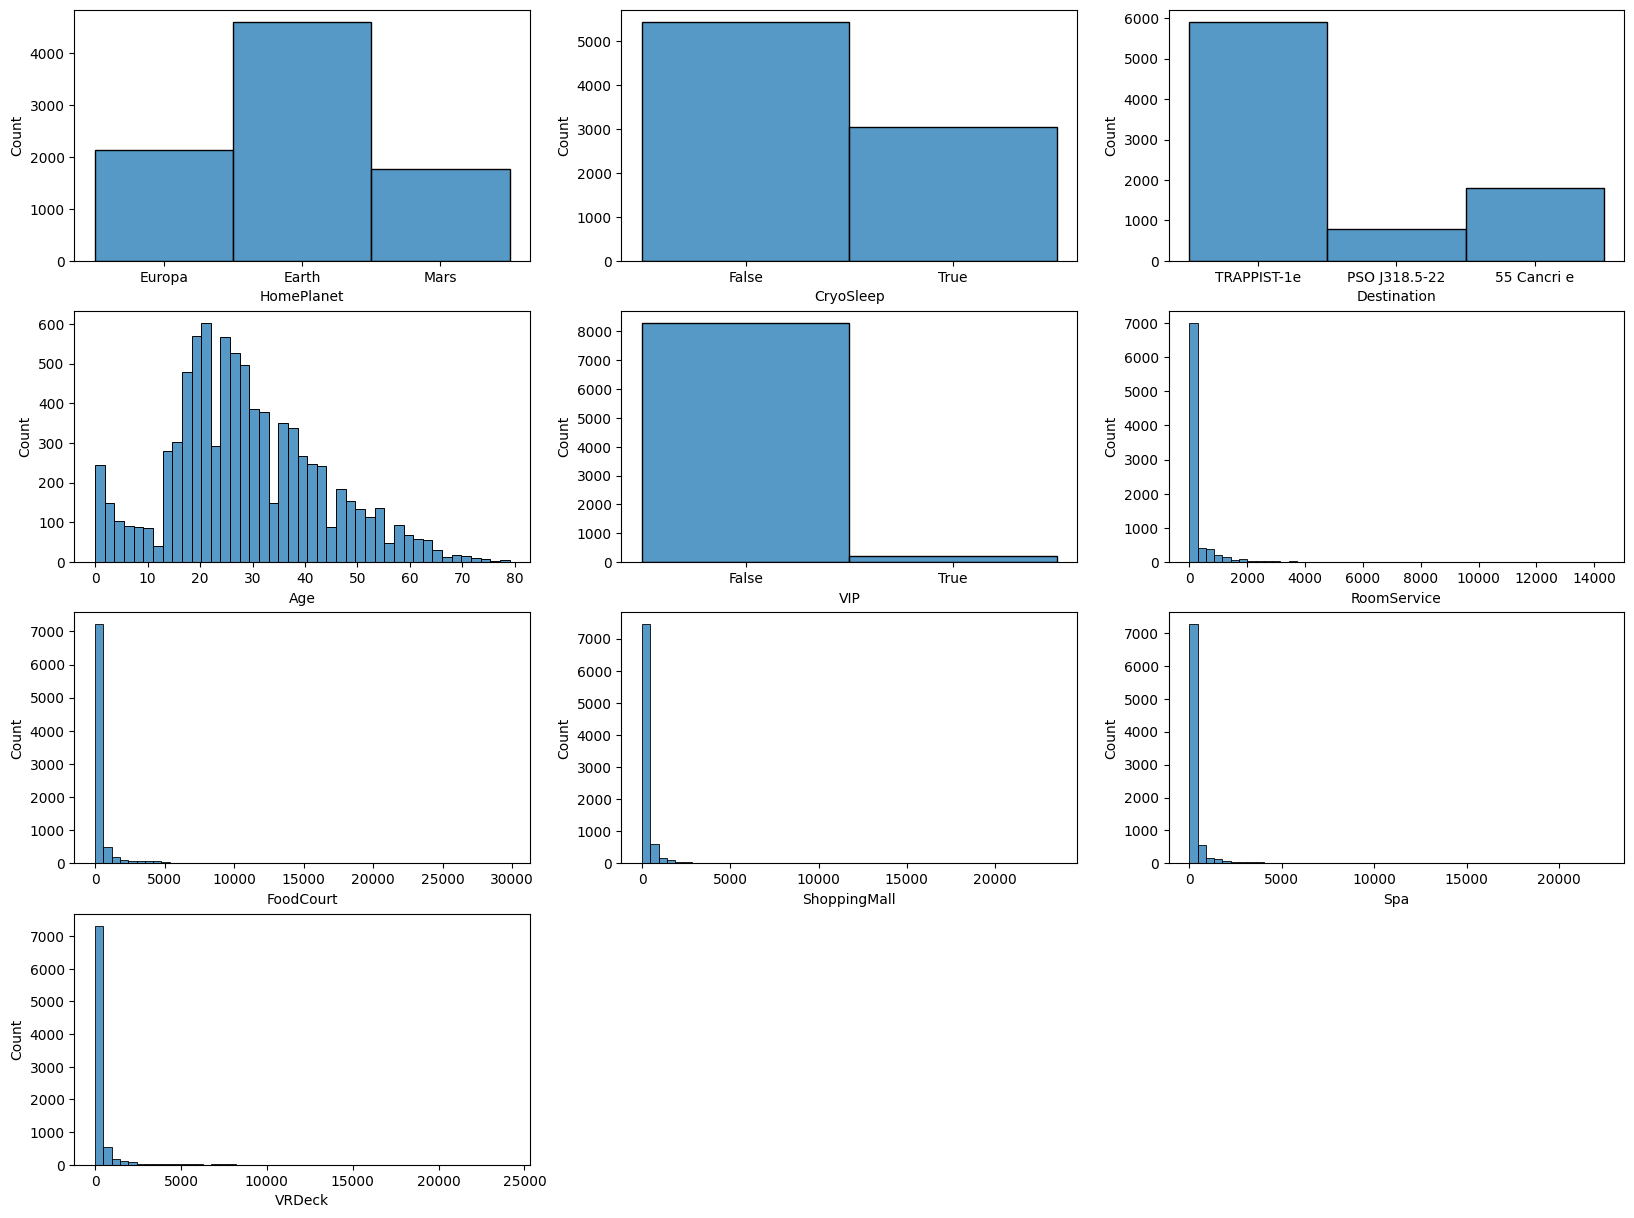

In [7]:
fig, ax = plt.subplots(4,3,figsize=(20,15))
ax = ax.flatten()

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['False', 'True'])

ax[4].set_xticks([0, 1])
ax[4].set_xticklabels(['False', 'True'])

sns.histplot(train["HomePlanet"],ax=ax[0])
sns.histplot(train["CryoSleep"],ax=ax[1], discrete=True)
sns.histplot(train["Destination"],ax=ax[2])
sns.histplot(train["Age"],ax=ax[3])
sns.histplot(train["VIP"],ax=ax[4], discrete=True)
sns.histplot(train["RoomService"],ax=ax[5], bins=50)
sns.histplot(train["FoodCourt"],ax=ax[6], bins=50)
sns.histplot(train["ShoppingMall"],ax=ax[7], bins=50)
sns.histplot(train["Spa"],ax=ax[8], bins=50)
sns.histplot(train["VRDeck"],ax=ax[9], bins=50)

for i in range(10, len(ax)):
    ax[i].axis("off")

plt.show()

In [8]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
print(train["Cabin"][222])

nan


In [10]:
def pre_processing(df):
    df = df.copy()
    df = df.drop(["PassengerId", "Name"], axis=1)
    df = df.dropna()
    df["CryoSleep"] = df["CryoSleep"].astype("int")
    df["VIP"] = df["VIP"].astype("int")
    df["Transported"] = df["Transported"].astype("int")
    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df = df.drop(["Cabin"], axis=1)
    return df

In [11]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [12]:
train = pre_processing(train)

In [13]:
train.isna().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [14]:
# print(train["Deck"][222])
# print(train["Cabin_num"][222])
# print(train["Side"][222])

In [15]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Cabin_num', 'Side'],
      dtype='object')

In [16]:
target = "Transported"
features = train.columns[train.columns != target]
x = train[features]
y = train[target]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

train_data = pd.concat([x_train, y_train], axis=1)

In [18]:
train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=target)

In [19]:
rf = tfdf.keras.RandomForestModel()
rf.fit(train_data)

Use /tmp/tmp501h1pk5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.189108. Found 4734 examples.
Training model...


[INFO 23-12-21 21:31:07.8682 WET kernel.cc:1233] Loading model from path /tmp/tmp501h1pk5/model/ with prefix a22cc1f325c044a9


Model trained in 0:00:03.371564
Compiling model...


[INFO 23-12-21 21:31:08.2337 WET decision_forest.cc:660] Model loaded with 300 root(s), 176904 node(s), and 13 input feature(s).
[INFO 23-12-21 21:31:08.2338 WET abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 23-12-21 21:31:08.2338 WET kernel.cc:1061] Use fast generic engine


Model compiled.


In [22]:
plot = tfdf.model_plotter.plot_model(rf, tree_idx=1, max_depth=3)

In [ ]:
html_file_path = "tree_plot.html"

with open(html_file_path, "w") as html_file:
    html_file.write(plot)

print(f"Tree plot HTML saved to: {html_file_path}")